In [1]:
# Read the text files of Atlassian, Cloudera, New Relic, Okta and Zuora earnings calls

filename = 'Saas_companies.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

In [2]:
# import NLTK (Natural Language Toolkit)
# use tokenize package to split at punctuation other than periods and white space; import stopwords
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [3]:
# split into words
tokens = word_tokenize(text)

In [4]:
# remove from tokens any unwanted characters and punctuation
words = [x for x in tokens if len(x) >2]
# remove numbers
words = [w for w in words if not w.isnumeric()]
# lowercase all words because default_stopwords are lowercase too
words = [word.lower() for word in words]
# create variable for NLTK stopwords
stopwords_eng = set(nltk.corpus.stopwords.words('english'))
# remove stopwords
words = [word for word in words if word not in stopwords_eng]

In [5]:
# names of participants
filename_names = 'saasCallNames.txt'
file_two = open(filename_names, 'rt')
text_two = file_two.read()
file.close()

In [6]:
# split into words
tokens_names = word_tokenize(text_two)

In [7]:
# remove from tokens any unwanted characters and punctuation
words_names = [x for x in tokens_names if len(x) >2]
# remove numbers
words_names = [w for w in words_names if not w.isnumeric()]
# lowercase all words because default_stopwords are lowercase too
words_names = [word.lower() for word in words_names]

In [8]:
# other terms like names, terms that show up in a transcript that aren't useful for analysis
terms = words_names
# remove other terms
words = [word for word in words if word not in terms]

In [9]:
# Check top words so far
# Calculate frequency distribution
fdist = nltk.FreqDist(words)
# Output top 10 words
for word, frequency in fdist.most_common(10):
    print(u'{};{}'.format(word, frequency))

customers;251
're;236
think;205
quarter;165
cloud;151
revenue;144
year;142
million;135
growth;132
like;129


In [10]:
#import wordcloud and matplotlib for chart
from wordcloud import WordCloud, STOPWORDS
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (18.0, 15.0)

In [11]:
# create string of words list so that WordCloud can be created
words_string = " ".join(str(x) for x in words)

(-0.5, 1599.5, 899.5, -0.5)

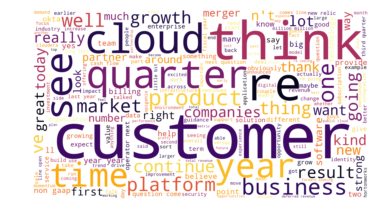

In [12]:
# remove any other stopwords we might have missed
other_stopwords = set(STOPWORDS)
# create WordCloud Object
wc = WordCloud(background_color="white", stopwords=other_stopwords,
               width=1600, height=900, colormap=matplotlib.cm.inferno)
# Generate WordCloud
wc.generate(words_string)
# Show the WordCloud
plt.figure()

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

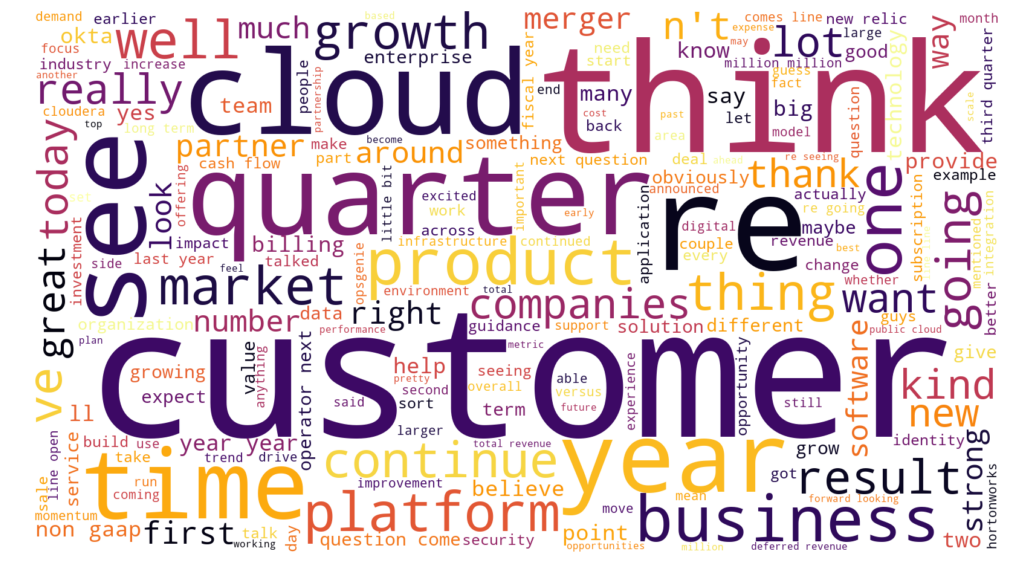

In [13]:
# Larger view, and save into jpg file
plt.figure( figsize=(20,10) )
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.savefig('Saas.jpg', format='jpg', dpi=600)

In [14]:
# let's combine some similar terms
words = list(map(lambda word: word.replace('customers', 'customer'),words))
words = list(map(lambda word: word.replace('companies', 'company'),words))
words = list(map(lambda word: word.replace('businesses', 'business'),words))
words = list(map(lambda word: word.replace('quarters', 'quarter'),words))

In [15]:
# remove other terms that are unhelpful to industry evaluation and are common to earnings calls/"call speak"
more_terms = ["'re",'think','quarter','year','million','billion','like',"'ve",'today','well','also','last',
              'operator','really','would','line','much','fiscal','want',"n't","'ll",'continue','one','thing',
              'time','way','around','lot','something','some','business','next','question','said','obviously',
              'give','given','going','thank','things','thing','get','seeing','thanks','could','look',
              'many','third','second','know','yes','guys','maybe','talk','use','bit','let','ago','earlier',
              'may','ask','result','see','come','say','pretty','question','company','great','first','right',
              'kind','results','good','afternoon','okay','two','new','relic','cloudera','zuora','atlassian',
               'okta','done','whether','comes','become','forward','looking','number','side','statement',
               'income','month','highlight','growth','market','help','actually','able','past','put','different',
               'believe','point','got','net','across','year ',' year','little','take','years','still','big',
             'year-over-year','sort','seen','strong','excited','expect','make']

words_edit = [word for word in words if word not in more_terms]

In [16]:
# Check top words so far
# Calculate frequency distribution
fdist = nltk.FreqDist(words_edit)
# Output top 10 words
for word, frequency in fdist.most_common(10):
    print(u'{};{}'.format(word, frequency))

customer;373
cloud;151
revenue;144
platform;88
data;73
software;68
identity;65
product;55
enterprise;54
operating;50


In [17]:
# create string of words list so that WordCloud can be created
words_string_edit = " ".join(str(x) for x in words_edit)

(-0.5, 1599.5, 899.5, -0.5)

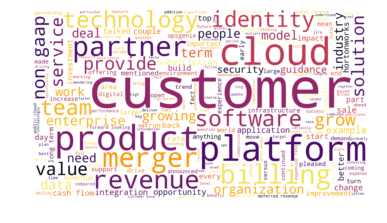

In [18]:
# remove any other stopwords we might have missed
other_stopwords = set(STOPWORDS)
# create WordCloud Object
wc = WordCloud(background_color="white", stopwords=other_stopwords,
               width=1600, height=900, colormap=matplotlib.cm.inferno)
# Generate WordCloud
wc.generate(words_string_edit)
# Show the WordCloud
plt.figure()

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

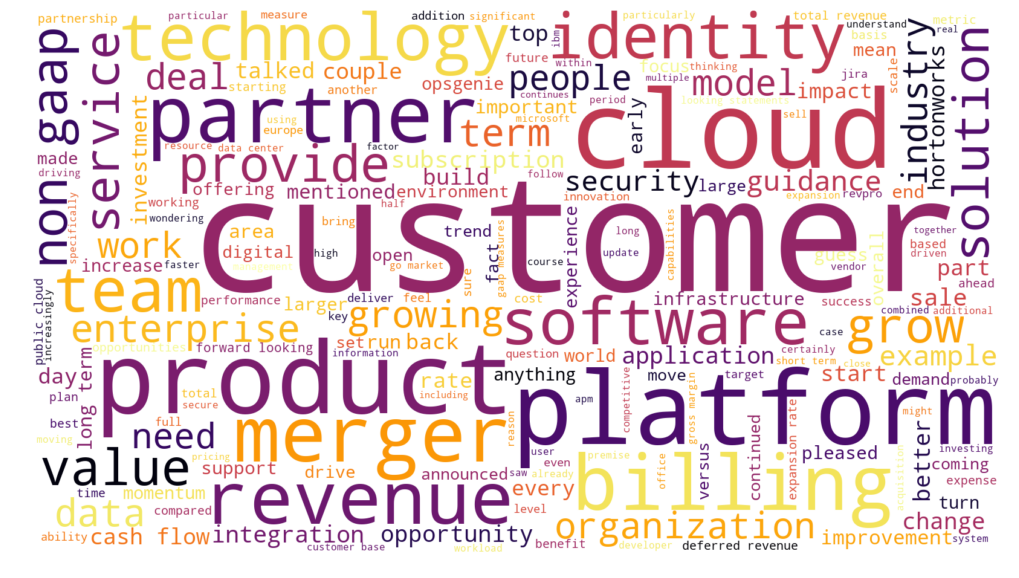

In [19]:
plt.figure( figsize=(20,10) )
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.savefig('SaaS2.jpg', format='jpg', dpi=600)

In [20]:
# use concordance to show the occurrence of a given word, together with some context
# first create a text object
text_obj = nltk.Text(tokens)

In [21]:
# try some terms to see how they are used in a given context
text_obj.concordance('product')

Displaying 25 of 55 matches:
ery significant improvements in the product . We 're investing heavily in our p
t . We 're investing heavily in our product every month , and this comes throug
e , it 's pretty high value-to-cost product . So how do you capture more of the
 we believe in providing incredible product in the most affordable price . That
t in the context of the data center product family , which we 've talked about 
ave kind of visibility into how the product 's being used and we have kind of d
nnecting to the customer kind of in product to open up different paths and aven
hat help joint customers across our product portfolios to have the best experie
mers themselves can grow inside the product that they 're already in . So if th
, is that the way we distribute our product , it 's really chosen by the end us
the choice of a customer to run the product where it best fits them but provide
move faster or there 's an existing product out there . We also have a very str
igher price

In [22]:
text_obj.concordance('platform')

Displaying 25 of 88 matches:
a whole , to our work on our Cloud platform , which you can think of really as
much more that part of the overall platform that we offer that was driving the
ns than the -- behind the firewall platform offerings that we have because , o
assian builds . And we provide the platform for that to connect those vendors 
o to the -- try to solve more of a platform solution , kind of emphasizing the
e -- JIRA , we got this incredible platform in JIRA that handles all the workf
rkflows , I 'd say , on top of the platform that we 've already built . Operat
ties through our independent cloud platform . As a reminder , we address two m
Deloitte to find a single identity platform that could manage and secure both 
inue to innovate and expand on our platform . There are a couple of overarchin
tely independent and neutral cloud platform for identity . Because our busines
rs think of Okta as an independent platform that helps them futureproof their 
because we offer a sing

In [23]:
text_obj.concordance('acquisition')

Displaying 14 of 14 matches:
flow . In October , we closed the acquisition of OpsGenie , a leader in inciden
arquhar Yes , I think you have -- acquisition from Microsoft , we have n't seen
ld say , judiciously exercise our acquisition model over time as another way fo
ur installed base on the OpsGenie acquisition ? And I guess , given the price r
sGenie purely on the basis of our acquisition and knowing that the increased in
ove to acquire something . On the acquisition side , we 've got a very strong t
at may be derived from our recent acquisition . Forward-looking statements invo
Last quarter , I talked about our acquisition of ScaleFT as an important step i
ve landscape relative to Cisco 's acquisition of Duo and to what extent you 're
ng to see any time there 's a big acquisition like that , you 're going to see 
 be tip note of IBM ’ s announced acquisition of Red Hat . Of course , the move
d be to you given IBM ’ s pending acquisition of Red Hat ? Lew Cirne Sure . So 
 . We think

In [24]:
text_obj.concordance('arr')

Displaying 11 of 11 matches:
t hundred new deals over $ 100,000 in ARR , partners notice that as well and th
customers with more than $ 100,000 of ARR at the conclusion of Q3 . Reflecting 
 customers with more than $ 1 million ARR , representing 52 % of software reven
 at high -- greater than $ 100,000 of ARR or expand more than 100,000 of ARR . 
of ARR or expand more than 100,000 of ARR . That 's really our measure of a tru
teady sequential growth in enterprise ARR and accounts paying more than $ 100,0
, which totaled more than 40 % of new ARR . Once again , New Relic Insights and
 . When you factor in the significant ARR growth of our installed base during t
the quarter-end totals for enterprise ARR now at 56 % of our business , as well
se business was approximately 56 % of ARR , up around 51 % as of the same perio
ion deal with existing million-dollar ARR paid business account , which include


In [25]:
text_obj.concordance('ACV')

Displaying 2 of 2 matches:
g metrics in Q3 . Customers over 100K ACV maintained a solid growth rate of 30 
s to represent over 80 % of our total ACV . In addition , we are continuing to 


In [26]:
text_obj.concordance('solution')

Displaying 21 of 21 matches:
-- try to solve more of a platform solution , kind of emphasizing the synergie
ing now is as we provide more of a solution , we 're becoming more of a truste
e . And where there 's an existing solution in the marketplace , where we beli
nized that its outsourced identity solution lacked a full view of its customer
enterprise wide workforce identity solution because of our credibility across 
oblems with a simple and intuitive solution and the ability to keep pace with 
ions driving more interest in your solution or is it even having an adverse ef
r maybe it 's just more of a niche solution not a broader platform . So I thin
 , reliable , scalable performance solution for the government agencies for a 
 engine , by delivering as a cloud solution . So , we 're getting better , but
oming to North America , that 's a solution that 's been out there for quite s
he only player to offer a complete solution from the edge to AI , increasingly
 , we will provide a co

I thought some interesting terms jumped out of this exercise: customer, cloud, product, platform and customer.  We are able to get a sense of the areas of focus of management teams, investors and analysts.